In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
airQ_data = pd.read_csv('../Datasets/AirQuality/AirQualityData_3/airquality-1998_2017.csv', low_memory =False)
len(airQ_data)
airQ_data.tail()

,id,city_name,state_name,Week,Year,avg_aqi
61771,61382,Long Beach,California,53,2017,127.333333
61772,61454,Anaheim,California,53,2017,116.000000
61773,61540,El Cajon,California,53,2017,92.000000
61774,61596,Chico,California,53,2017,95.000000
61775,61764,Yuba City,California,53,2017,82.000000


In [3]:
len(airQ_data)

61776

In [4]:
#Removing city and taking avg
airQ_data_mean = airQ_data.groupby(['state_name','Week','Year'])['avg_aqi'].mean().reset_index()
airQ_data_mean.head()

,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [5]:
len(airQ_data_mean)

1011

In [6]:
#dropping 0 values
indexNames = airQ_data_mean[ (airQ_data_mean['avg_aqi'] == 0.000000)].index
airQ_data_mean.drop(indexNames , inplace=True)
airQ_data_mean.head()


,state_name,Week,Year,avg_aqi
0,California,0,1999,92.500000
1,California,0,2000,75.437500
2,California,0,2001,87.254457
3,California,0,2002,61.261568
4,California,0,2003,55.143505


In [7]:
len(airQ_data_mean)

1011

In [8]:
airQ_data_mean['Week'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [9]:
#increasing week number by 1 to match influenza data
airQ_data_mean['Week'] = airQ_data_mean['Week']+1
airQ_data_mean['Week'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

In [10]:
airQ_data_mean['Year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010,
       2011, 2013, 2014, 2015, 2016, 2006, 2012, 2017, 1998], dtype=int64)

In [11]:
airQ_data_mean

,state_name,Week,Year,avg_aqi
0,California,1,1999,92.500000
1,California,1,2000,75.437500
2,California,1,2001,87.254457
3,California,1,2002,61.261568
4,California,1,2003,55.143505
...,...,...,...,...
1006,California,53,2017,78.873386
1007,California,54,2000,130.863636
1008,California,54,2006,83.514493
1009,California,54,2012,63.000000


In [12]:
#we will use this influenza data
influenza_data = pd.read_csv('../Datasets/Disease cases/influenza/AgeViewByWeek_Influenza.csv', low_memory=False)
influenza_data.head()

,Year,Week,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,2019,40,(0-4)yr,0,0,4,3,4,6,0,1,0
1,2019,41,(0-4)yr,0,0,2,5,3,15,0,0,0
2,2019,42,(0-4)yr,0,0,14,3,0,15,0,4,0
3,2019,43,(0-4)yr,0,0,4,4,0,12,0,3,0
4,2019,44,(0-4)yr,0,0,7,6,0,12,1,0,0


In [13]:
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [14]:
influenza_data['Year'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997], dtype=int64)

In [15]:
#merging AQ data && influenza data

merged = pd.merge(airQ_data_mean,influenza_data,how='inner', left_on=['Year', 'Week'], right_on=['Year','Week'])

In [16]:
len(merged)

3944

In [17]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


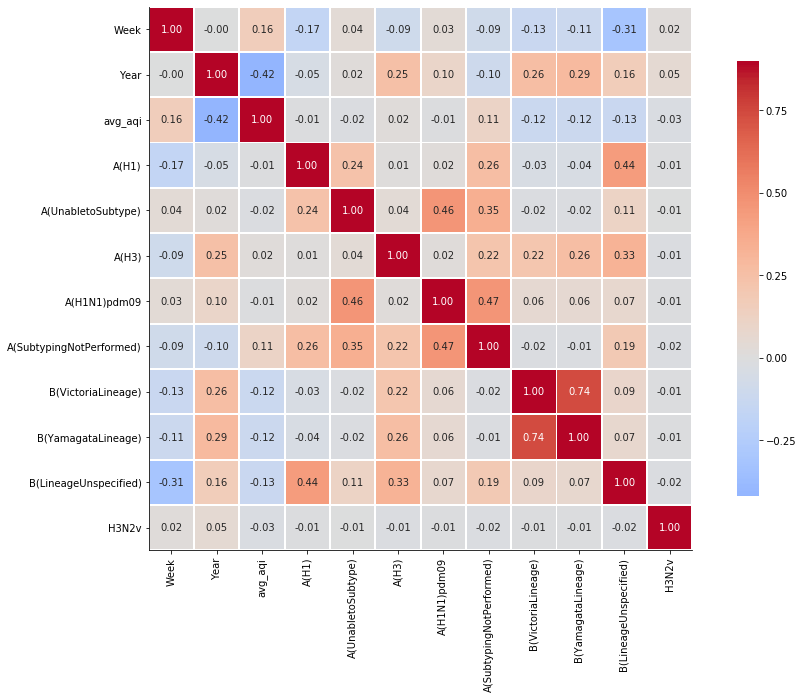

In [18]:
corr = merged.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [19]:
merged_filtered = merged[merged['AgeGroup'] == '(25-64)yr']
influenza_data['AgeGroup'].unique()

array(['(0-4)yr', '(5-24)yr', '(25-64)yr', '(65+)yr'], dtype=object)

In [20]:
merged_filtered.head()

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
6,California,1,2000,75.437500,(25-64)yr,0,0,132,0,80,0,0,0,0
10,California,1,2001,87.254457,(25-64)yr,36,0,1,0,6,0,0,31,0
14,California,1,2002,61.261568,(25-64)yr,0,0,33,0,7,0,0,1,0
18,California,1,2003,55.143505,(25-64)yr,13,0,4,0,1,0,0,6,0


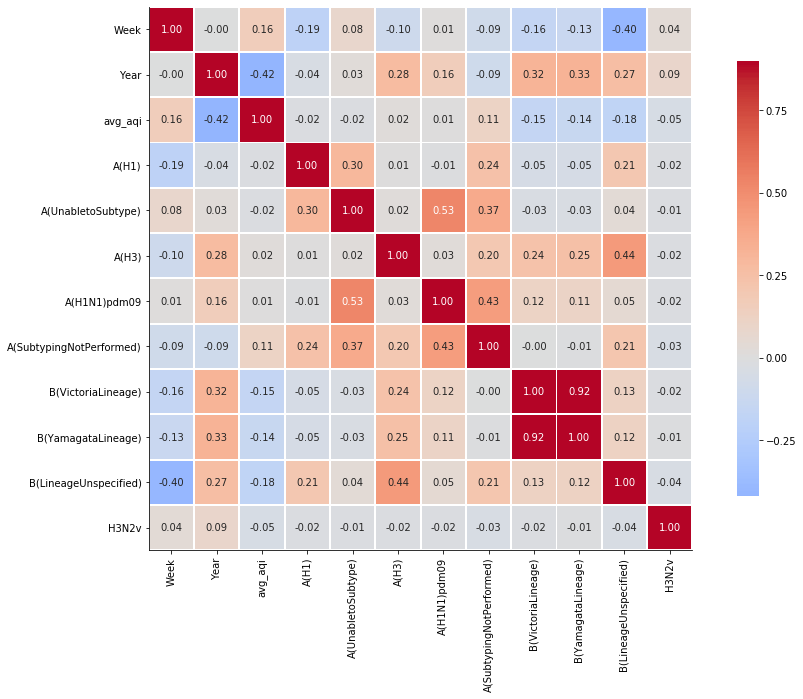

In [21]:
corr = merged_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

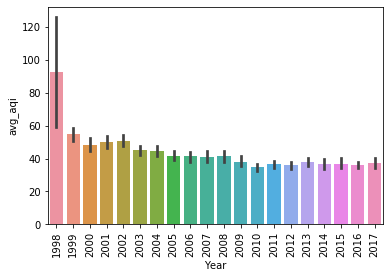

In [22]:
sns.barplot(x='Year', y='avg_aqi', data=merged_filtered, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

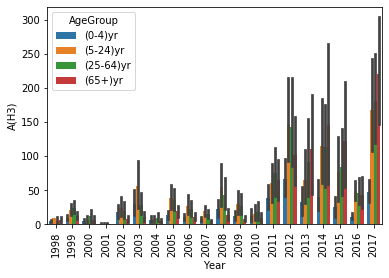

In [23]:
sns.barplot(x='Year', y='A(H3)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

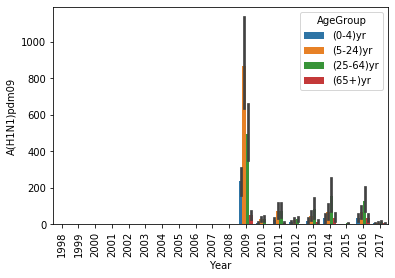

In [24]:
sns.barplot(x='Year', y='A(H1N1)pdm09', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

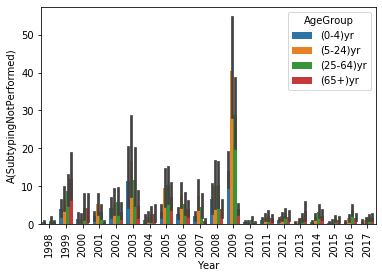

In [25]:
sns.barplot(x='Year', y='A(SubtypingNotPerformed)', hue='AgeGroup', data=merged, saturation=0.8)
plt.xticks(rotation=90)


In [26]:
merged

,state_name,Week,Year,avg_aqi,AgeGroup,A(H1),A(UnabletoSubtype),A(H3),A(H1N1)pdm09,A(SubtypingNotPerformed),B(VictoriaLineage),B(YamagataLineage),B(LineageUnspecified),H3N2v
0,California,1,1999,92.500000,(0-4)yr,0,0,7,0,1,0,0,7,0
1,California,1,1999,92.500000,(5-24)yr,0,0,14,0,5,0,0,15,0
2,California,1,1999,92.500000,(25-64)yr,0,0,29,0,5,0,0,12,0
3,California,1,1999,92.500000,(65+)yr,0,0,12,0,14,0,0,6,0
4,California,1,2000,75.437500,(0-4)yr,1,0,47,0,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,California,53,2009,54.811905,(65+)yr,0,1,0,61,4,0,0,0,0
3940,California,53,2014,53.122396,(0-4)yr,0,0,246,0,1,0,0,12,0
3941,California,53,2014,53.122396,(5-24)yr,0,0,347,0,6,0,0,21,0
3942,California,53,2014,53.122396,(25-64)yr,0,0,847,0,4,0,0,37,0


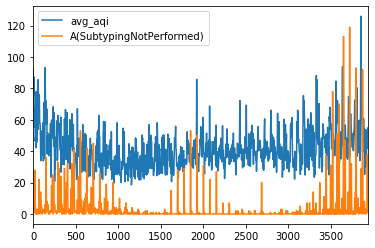

In [27]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(0-4)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

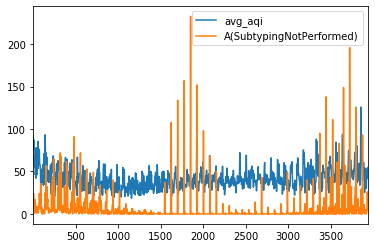

In [28]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(5-24)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

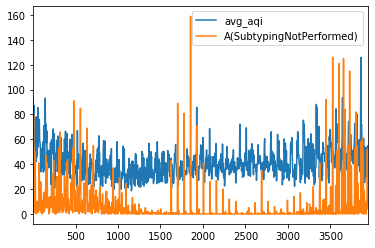

In [29]:
#plotting AQ index value vs. Virus
merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

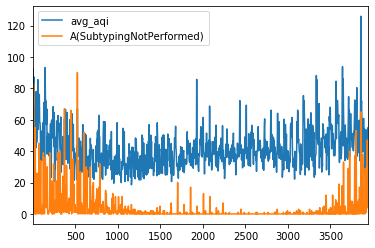

In [30]:
#plotting AQ index value vs. Virus vs age group
merged_filtered=merged[merged['AgeGroup'] == '(65+)yr']
merged_filtered[['avg_aqi','A(SubtypingNotPerformed)']].plot()

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5, 2020. ]), <a list of 11 Text xticklabel objects>)

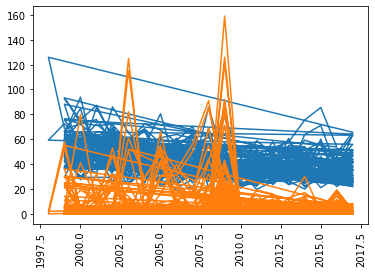

In [31]:
plt.figure()

merged_filtered=merged[merged['AgeGroup'] == '(25-64)yr']


x = merged_filtered['Year']
y1 = merged_filtered['avg_aqi'] 
y2 = merged_filtered['A(SubtypingNotPerformed)']


plt.plot(x,y1)
plt.plot(x,y2)
plt.xticks(rotation=90)

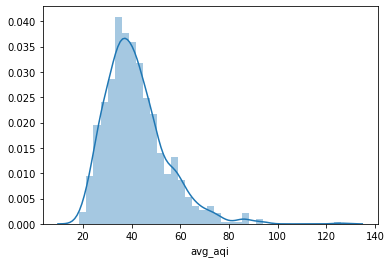

In [32]:
sns.distplot(merged_filtered['avg_aqi'])
plt.show()

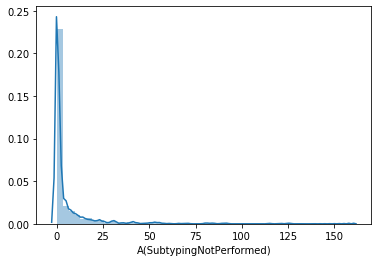

In [33]:
sns.distplot(merged_filtered['A(SubtypingNotPerformed)'])
plt.show()

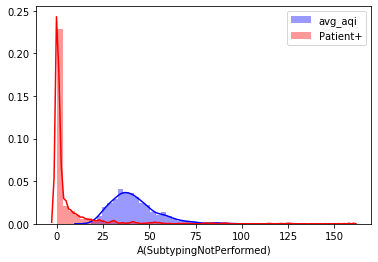

In [34]:
# Method 1: on the same Axis
sns.distplot( (merged_filtered["avg_aqi"]) , color="blue", label="avg_aqi")
sns.distplot( merged_filtered["A(SubtypingNotPerformed)"] , color="red", label="Patient+")
plt.legend()
 
plt.show()


In [35]:
merged.columns

Index(['state_name', 'Week', 'Year', 'avg_aqi', 'AgeGroup', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v'],
      dtype='object')

In [36]:
import datetime
merged['Month']= merged['Year'].astype(str).map(str) + "-W"+ merged['Week'].astype(str)
for a in range(0,len(merged)):
    merged.ix[a, 'MonthNo']= datetime.datetime.strptime(merged.ix[a, 'Month'] + '-1', '%G-W%V-%u')
    #print(pd.Timestamp(np.datetime64(merged.ix[a, 'MonthNo'])).to_pydatetime())
    merged.ix[a,'MonthNo_date']=pd.Timestamp(np.datetime64(merged.ix[a, 'MonthNo'])).to_pydatetime()
    #merged.ix[a, 'MonthNo']= datetime.datetime.strptime((merged.ix[a, 'MonthNo']).astype(str), "%Y-%m")

merged['MonthNo_date']= merged.MonthNo_date.dt.year.astype(str).map(str) + "-"+ merged.MonthNo_date.dt.month.astype(str)
merged['MonthNo_date'].unique


c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


<bound method Series.unique of 0        1999-1
1        1999-1
2        1999-1
3        1999-1
4        2000-1
         ...   
3939    2009-12
3940    2014-12
3941    2014-12
3942    2014-12
3943    2014-12
Name: MonthNo_date, Length: 3944, dtype: object>

In [37]:
merged.head()
merged_f= merged[merged['AgeGroup'] == '(25-64)yr']
#monthly -> yearly Mean value: method 1
merged_monthly = merged_f.groupby(['state_name', 'Year','AgeGroup','MonthNo_date'])['avg_aqi', 'A(H1)',
       'A(UnabletoSubtype)', 'A(H3)', 'A(H1N1)pdm09',
       'A(SubtypingNotPerformed)', 'B(VictoriaLineage)', 'B(YamagataLineage)',
       'B(LineageUnspecified)', 'H3N2v'].mean().reset_index()
merged_monthly.head()
len(merged_monthly)
#merged_monthly.to_csv('../Datasets/merged_monthly.csv')

236

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [76]:
merged_var=merged_monthly[(merged_monthly['AgeGroup'] == '(25-64)yr')] 
len(merged_var)

236

In [101]:
merged_var = pd.read_csv('../Datasets/merged_monthly.csv', low_memory =False)
len(merged_var)
merged_var.tail()

,id,state_name,Year,AgeGroup,MonthNo_date,avg_aqi,A_H1,A_UnabletoSubtype,A_H3,A_H1_N1,A_SubtypingNotPerformed,B_VictoriaLineage,B_YamagataLineage,B_LineageUnspecified,H_3N_2v
231,231,California,2017,(25-64)yr,2017-05-01,28.862509,0.0,0.0,21.00,1.80,0.60,11.60,35.40,8.80,0.0
232,232,California,2017,(25-64)yr,2017-06-01,33.593602,0.0,0.0,12.50,4.00,0.00,3.50,14.50,2.75,0.0
233,233,California,2017,(25-64)yr,2017-07-01,39.456591,0.0,0.0,10.00,2.80,0.40,0.80,4.40,1.60,0.0
234,234,California,2017,(25-64)yr,2017-08-01,46.746473,0.0,0.0,14.50,2.25,0.50,0.00,2.75,0.25,0.0
235,235,California,2017,(25-64)yr,2017-09-01,47.128941,0.0,0.0,34.75,3.00,0.25,0.25,5.50,1.50,0.5


In [102]:
merged_var.columns

Index(['id', 'state_name', 'Year', 'AgeGroup', 'MonthNo_date', 'avg_aqi',
       'A_H1', 'A_UnabletoSubtype', 'A_H3', 'A_H1_N1',
       'A_SubtypingNotPerformed', 'B_VictoriaLineage', 'B_YamagataLineage',
       'B_LineageUnspecified', 'H_3N_2v'],
      dtype='object')

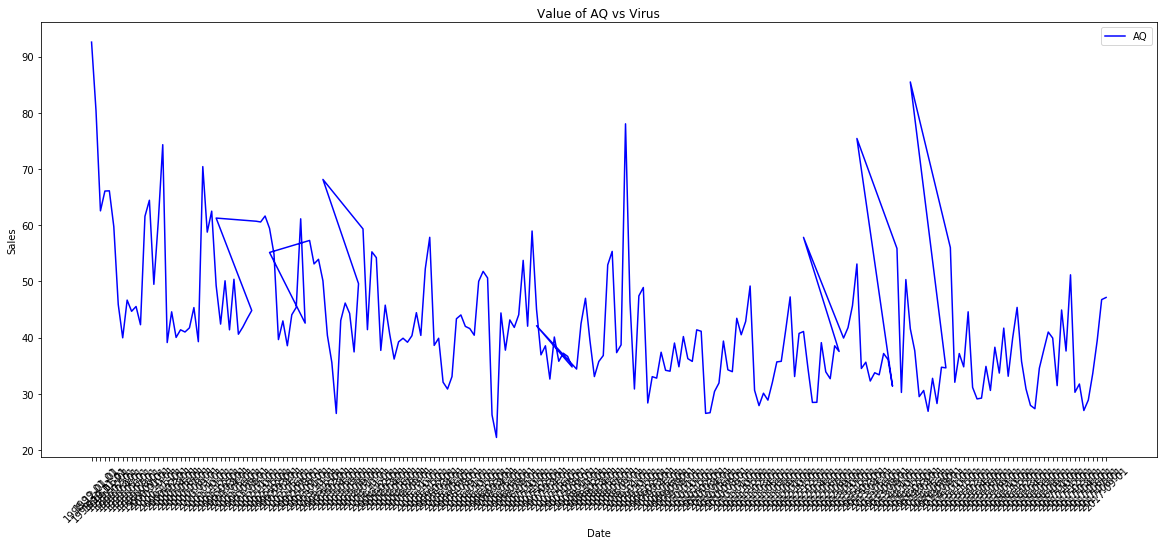

In [103]:
plt.figure(figsize=(20, 8))
plt.plot(merged_var['MonthNo_date'], merged_var['avg_aqi'], 'b-', label = 'AQ')
#plt.plot(merged_var['MonthNo_date'], merged_var['A(H1N1)pdm09'], 'r-', label = 'Virus')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Value of AQ vs Virus')
plt.xticks(rotation=45)
plt.legend();

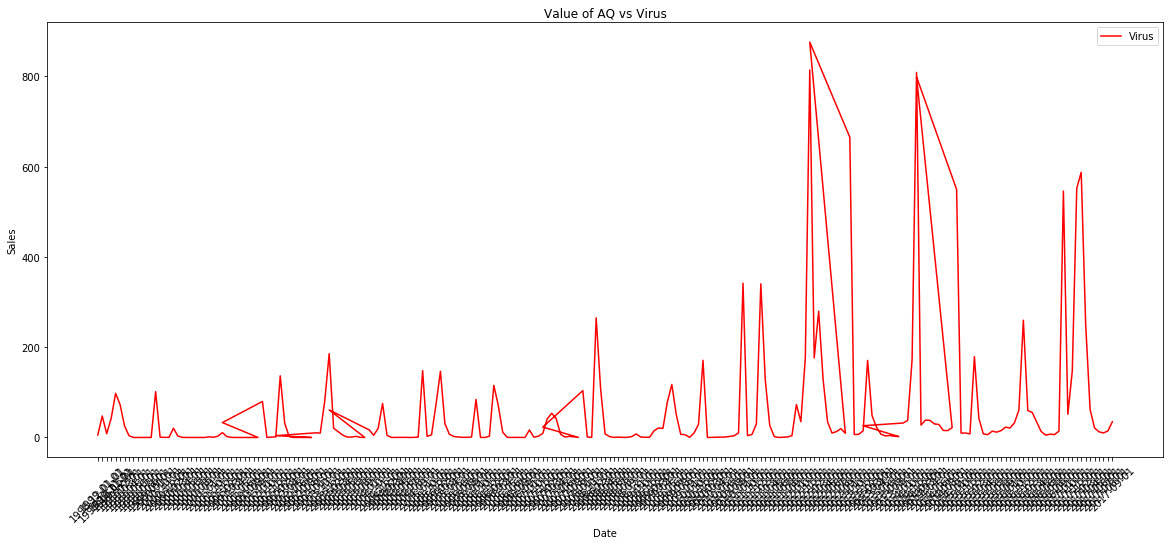

In [105]:
plt.figure(figsize=(20, 8))
#plt.plot(merged_var['MonthNo_date'], merged_var['avg_aqi'], 'b-', label = 'AQ')
plt.plot(merged_var['MonthNo_date'], merged_var['A_H3'], 'r-', label = 'Virus')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Value of AQ vs Virus')
plt.xticks(rotation=45)
plt.legend();

In [106]:
merged_var.columns

Index(['id', 'state_name', 'Year', 'AgeGroup', 'MonthNo_date', 'avg_aqi',
       'A_H1', 'A_UnabletoSubtype', 'A_H3', 'A_H1_N1',
       'A_SubtypingNotPerformed', 'B_VictoriaLineage', 'B_YamagataLineage',
       'B_LineageUnspecified', 'H_3N_2v'],
      dtype='object')

In [107]:

merged_var= merged_var.drop(['id','state_name','AgeGroup','H_3N_2v','Year'], axis =1 )
merged_var.head()

,MonthNo_date,avg_aqi,A_H1,A_UnabletoSubtype,A_H3,A_H1_N1,A_SubtypingNotPerformed,B_VictoriaLineage,B_YamagataLineage,B_LineageUnspecified
0,1998-12-01-01,92.583333,0.5,0.0,5.50,0.0,1.00,0.0,0.0,6.00
1,1999-01-01,80.402680,0.0,0.0,47.50,0.0,9.25,0.0,0.0,20.50
2,1999-10-01-01,62.545959,0.0,0.0,8.25,0.0,1.75,0.0,0.0,0.25
3,1999-11-01,66.072382,0.0,0.0,42.20,0.0,9.80,0.0,0.0,0.00
4,1999-12-01,66.110907,0.0,0.0,97.75,0.0,50.50,0.0,0.0,0.00


In [108]:
#setting the new month as index
merged_var.NewMonth = pd.to_datetime(merged_var["MonthNo_date"])
merged_var.set_index('MonthNo_date', inplace=True)#MonthNo_date

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


IndexError: index 9 is out of bounds for axis 0 with size 9

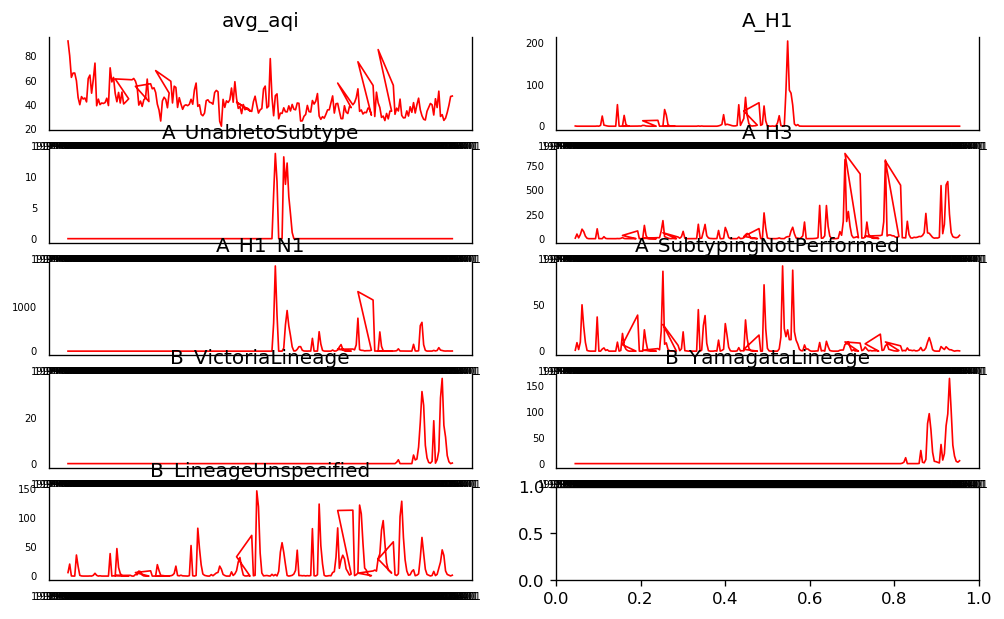

In [109]:
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = merged_var[merged_var.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(merged_var.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [110]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    merged_var = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in merged_var.columns:
        for r in merged_var.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            merged_var.loc[r, c] = min_p_value
    merged_var.columns = [var + '_x' for var in variables]
    merged_var.index = [var + '_y' for var in variables]
    return merged_var

grangers_causation_matrix(merged_var, variables = merged_var.columns)   

#avg_aqi_x causing A_H3 with p-val = .0074

#So, how to interpret the p-values?
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#Grangers Causality test

,avg_aqi_x,A_H1_x,A_UnabletoSubtype_x,A_H3_x,A_H1_N1_x,A_SubtypingNotPerformed_x,B_VictoriaLineage_x,B_YamagataLineage_x,B_LineageUnspecified_x
avg_aqi_y,1.0000,0.0228,0.3297,0.0003,0.0269,0.0172,0.0573,0.0243,0.0000
A_H1_y,0.1418,1.0000,0.0000,0.3801,0.0000,0.0000,0.6597,0.6597,0.0505
A_UnabletoSubtype_y,0.0058,0.0000,1.0000,0.8825,0.0000,0.0000,0.8066,0.8066,0.0576
A_H3_y,0.0003,0.6947,0.6757,1.0000,0.0341,0.1442,0.0028,0.0001,0.0005
A_H1_N1_y,0.0633,0.0161,0.0000,0.1465,1.0000,0.4524,0.7421,0.7025,0.0063
A_SubtypingNotPerformed_y,0.0069,0.0000,0.0000,0.3493,0.0162,1.0000,0.6194,0.5993,0.1927
B_VictoriaLineage_y,0.4627,0.7368,0.8207,0.0224,0.3689,0.8345,1.0000,0.0000,0.0524
B_YamagataLineage_y,0.0862,0.7657,0.8407,0.0017,0.7911,0.7691,0.0000,1.0000,0.0162
B_LineageUnspecified_y,0.0171,0.4069,0.3895,0.0022,0.4040,0.4563,0.4726,0.3925,1.0000


In [111]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(merged_var)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
avg_aqi ::  344.01    > 179.5199  =>   True
A_H1   ::  249.33    > 143.6691  =>   True
A_UnabletoSubtype ::  177.75    > 111.7797  =>   True
A_H3   ::  116.44    > 83.9383   =>   True
A_H1_N1 ::  73.44     > 60.0627   =>   True
A_SubtypingNotPerformed ::  47.77     > 40.1749   =>   True
B_VictoriaLineage ::  29.88     > 24.2761   =>   True
B_YamagataLineage ::  13.64     > 12.3212   =>   True
B_LineageUnspecified ::  0.78      > 4.1296    =>   False


In [113]:
trainData, testData = train_test_split(merged_var, train_size=0.7, random_state=100)
Y_trainData = trainData[['B_VictoriaLineage']]
X_trainData= trainData.drop(['B_VictoriaLineage'], axis =1 )
X_trainData.head()

,avg_aqi,A_H1,A_UnabletoSubtype,A_H3,A_H1_N1,A_SubtypingNotPerformed,B_YamagataLineage,B_LineageUnspecified
MonthNo_date,,,,,,,,
2011-01-01,43.424220,0.00,0.0,341.80,285.20,9.40,0.00,81.00
2015-10-01,32.036482,0.00,0.0,9.75,4.00,0.25,0.75,2.25
2014-02-01,37.636849,0.00,0.0,27.50,428.75,7.50,0.00,37.75
1999-04-01,39.947227,0.00,0.0,4.00,0.00,0.75,0.00,1.25
2001-12-01,49.259144,0.25,0.0,10.75,0.00,19.25,0.00,0.00


In [114]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [115]:
# ADF Test on each column
for name, column in trainData.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.5524
 No. Lags Chosen       = 0
 Critical value 1%     = -3.471
 Critical value 5%     = -2.879
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_H1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.6226
 No. Lags Chosen       = 2
 Critical value 1%     = -3.471
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_UnabletoSubtype" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance 

In [116]:
# 1st difference
df_differenced = trainData.diff().dropna()

In [117]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.1726
 No. Lags Chosen       = 12
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_H1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.5381
 No. Lags Chosen       = 3
 Critical value 1%     = -3.472
 Critical value 5%     = -2.88
 Critical value 10%    = -2.576
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_UnabletoSubtype" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [118]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [119]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "avg_aqi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.3835
 No. Lags Chosen       = 14
 Critical value 1%     = -3.475
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_H1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.2447
 No. Lags Chosen       = 9
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "A_UnabletoSubtype" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance

In [120]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  61.48799616056069
BIC :  63.20332745791201
FPE :  5.064210415936821e+26
HQIC:  62.18444670085141 

Lag Order = 2
AIC :  59.28186903304813
BIC :  62.55466497349747
FPE :  5.624804800264036e+25
HQIC:  60.61075713385164 

Lag Order = 3
AIC :  58.43389817466418
BIC :  63.27729693365746
FPE :  2.4646041639042026e+25
HQIC:  60.400634611657004 

Lag Order = 4
AIC :  57.77957466506128
BIC :  64.20690233386215
FPE :  1.3405910856573155e+25
HQIC:  60.389643997966566 

Lag Order = 5
AIC :  57.24843680333325
BIC :  65.2732111303786
FPE :  8.520528294403785e+24
HQIC:  60.50739870895272 

Lag Order = 6
AIC :  56.78942248125141
BIC :  66.42535670830499
FPE :  6.087082590776594e+24
HQIC:  60.702913115039195 

Lag Order = 7
AIC :  56.40395701785268
BIC :  67.66496381385097
FPE :  4.972138976609496e+24
HQIC:  60.977690404669815 

Lag Order = 8
AIC :  55.61439609509003
BIC :  68.51459159067677
FPE :  2.940477383784152e+24
HQIC:  60.85416554978877 

Lag Order = 9
AIC :  54.83822209212

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [121]:
#train the var model of selected order

model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Dec, 2019
Time:                     02:58:46
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    67.6650
Nobs:                     156.000    HQIC:                   60.9777
Log likelihood:          -5815.70    FPE:                4.97214e+24
AIC:                      56.4040    Det(Omega_mle):     2.25352e+23
--------------------------------------------------------------------
Results for equation avg_aqi
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.000070         1.167446           -0.000           1.000
L1.avg_aqi                        -1.368778         0.114164          -11.990           0.000
L1.A_H

In [122]:
def adjust(val, length= 6): return str(val).ljust(length)

In [123]:
#serial corerelation

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(merged_var.columns, out):
    print(adjust(col), ':', round(val, 2))

avg_aqi : 2.12
A_H1   : 2.04
A_UnabletoSubtype : 1.9
A_H3   : 1.84
A_H1_N1 : 1.91
A_SubtypingNotPerformed : 2.04
B_VictoriaLineage : 2.17
B_YamagataLineage : 2.19
B_LineageUnspecified : 2.08


In [124]:
#forcast VAR using stat model

# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

7


array([[-4.61095579e+00,  3.75000000e+00,  0.00000000e+00,
        -1.50000000e+00,  1.32500000e+02,  4.75000000e+00,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+00],
       [ 2.75955169e+00,  0.00000000e+00,  0.00000000e+00,
         6.87500000e+01, -2.76250000e+02,  2.52500000e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.80334070e+01,  0.00000000e+00,  0.00000000e+00,
        -1.37500000e+02,  1.40000000e+02, -5.40000000e+01,
         0.00000000e+00,  0.00000000e+00,  2.50000000e-01],
       [ 1.88995139e+01,  1.85000000e+01,  0.00000000e+00,
         7.97500000e+01,  0.00000000e+00,  2.80000000e+01,
         0.00000000e+00,  0.00000000e+00,  1.02500000e+01],
       [ 6.14157903e+00, -3.70000000e+01,  0.00000000e+00,
         5.83333333e+01,  0.00000000e+00,  2.05000000e+01,
         0.00000000e+00,  0.00000000e+00, -1.50000000e+00],
       [-2.41413694e+01,  1.85000000e+01,  0.00000000e+00,
        -1.41666667e+02,  0.00000000e+00, -4.175000

In [125]:
merged_var.head()

,avg_aqi,A_H1,A_UnabletoSubtype,A_H3,A_H1_N1,A_SubtypingNotPerformed,B_VictoriaLineage,B_YamagataLineage,B_LineageUnspecified
MonthNo_date,,,,,,,,,
1998-12-01-01,92.583333,0.5,0.0,5.50,0.0,1.00,0.0,0.0,6.00
1999-01-01,80.402680,0.0,0.0,47.50,0.0,9.25,0.0,0.0,20.50
1999-10-01-01,62.545959,0.0,0.0,8.25,0.0,1.75,0.0,0.0,0.25
1999-11-01,66.072382,0.0,0.0,42.20,0.0,9.80,0.0,0.0,0.00
1999-12-01,66.110907,0.0,0.0,97.75,0.0,50.50,0.0,0.0,0.00


In [126]:
#forcast

# Forecast
nobs=225
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=merged_var.index[-nobs:], columns=merged_var.columns + '_2d')
df_forecast

,avg_aqi_2d,A_H1_2d,A_UnabletoSubtype_2d,A_H3_2d,A_H1_N1_2d,A_SubtypingNotPerformed_2d,B_VictoriaLineage_2d,B_YamagataLineage_2d,B_LineageUnspecified_2d
MonthNo_date,,,,,,,,,
1999-08-01,1.089760,3.876395,0.060848,136.208686,-94.242267,3.744241,0.994548,2.817306,-0.560420
1999-09-01,-12.540160,-18.672749,-0.911852,-275.409133,62.030755,-14.787138,-0.677759,-1.419666,-14.788762
2000-01-01,6.375640,28.218164,1.222304,205.350752,14.646406,14.611133,-1.914726,-4.965353,29.084430
2000-10-01,-9.068365,-8.449158,0.496952,-59.373798,157.046025,3.968525,4.706214,9.176801,-7.474362
2000-11-01,11.958223,-27.258609,-1.577999,-10.936869,-270.916773,-23.406761,-4.305008,-6.245997,-30.183238
...,...,...,...,...,...,...,...,...,...
2017-05-01,0.001944,-0.013703,0.001060,0.044364,0.320487,0.013975,0.000350,-0.000950,-0.001020
2017-06-01,0.001933,-0.013684,0.001061,0.044616,0.320557,0.013992,0.000358,-0.000919,-0.000958
2017-07-01,0.001935,-0.013667,0.001060,0.044445,0.320582,0.013983,0.000356,-0.000935,-0.001007


In [127]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [128]:
df_forecast.columns

Index(['avg_aqi_2d', 'A_H1_2d', 'A_UnabletoSubtype_2d', 'A_H3_2d',
       'A_H1_N1_2d', 'A_SubtypingNotPerformed_2d', 'B_VictoriaLineage_2d',
       'B_YamagataLineage_2d', 'B_LineageUnspecified_2d'],
      dtype='object')

In [129]:
df_results = invert_transformation(trainData, df_forecast, second_diff=True)        
df_results.loc[:, ['avg_aqi_forecast', 'A(H1)_forecast', 'A(UnabletoSubtype)_forecast', 'A(H3)_forecast',
       'A(H1N1)pdm09_forecast', 'A(SubtypingNotPerformed)_forecast',
       'B(VictoriaLineage)_forecast', 'B(YamagataLineage)_forecast',
       'B(LineageUnspecified)_forecast']]

c:\users\subar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,avg_aqi_forecast,A(H1)_forecast,A(UnabletoSubtype)_forecast,A(H3)_forecast,A(H1N1)pdm09_forecast,A(SubtypingNotPerformed)_forecast,B(VictoriaLineage)_forecast,B(YamagataLineage)_forecast,B(LineageUnspecified)_forecast
MonthNo_date,,,,,,,,,
1999-08-01,55.152527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-09-01,51.104041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,53.431196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-01,46.689985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-11-01,51.906998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017-05-01,238.457463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,239.530207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,240.604885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#plot forecast vs actual -check if working on not, working one is in R
df=merged_var
df_test=testData

fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();